In [6]:
!pip install wget
!pip install librosa
wget


NameError: ignored

In [4]:


import os
import math
import numpy as np
#import sys
#print(sys.version)

from scipy.io import wavfile
import pandas as pd
import keras
from keras.callbacks import LearningRateScheduler

import librosa

from importlib import reload
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (13.0, 5.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'


import speech_command_utils as scu
reload(scu)
import speech_command_models as scm
reload(scm)

3.6.3 (default, Oct  3 2017, 21:45:48) 
[GCC 7.2.0]


ModuleNotFoundError: ignored

In [7]:
!ls
!pwd

wget 
#from google.colab import files

#uploaded = files.upload()

#for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

datalab
/content
  Running setup.py bdist_wheel for wget ... - done
  Stored in directory: /content/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
tensorboard 1.8.0 has requirement markdown>=2.6.8, but you'll have markdown 2.2.0 which is incompatible.
tb-nightly 1.9.0a20180602 has requirement markdown>=2.6.8, but you'll have markdown 2.2.0 which is incompatible.


In [0]:
# Location of training data and the known words, i.e., the key words
data_path = os.path.normpath('C:/Users/johabergs/Desktop/Speech recognition/speech_commands_v0.01')
model_path = os.path.normpath('C:/Users/johabergs/Google Drive/kaggle') 

# Data parameter
keywords = ['yes','no','up','down','left','right','on','off','stop','go'] #words to regocnize
unknown_fraction = 0.15 #Fraction out of the total number of unknown words to use
num_bkg_examples = 6000
bkg_vol_range = [1e-4,1]
use_class_weights = False
use_binary_ent = True
output_acts = None


# Specify audio parameters
sample_time = 1
hop_time = 0.01;
win_time = 25e-3
n_mels = 40
spec_thr = 1

# List and label all files
all_files, all_labels = scu.list_and_label_using_folders(data_path,'wav')

# Filter speech files: remove background, use only a fraction of 'unknown' words, and assign that label to them
# Uses unknown_fraction
speech_files, speech_labels = scu.filter_speech_files(keywords, all_files, all_labels, unknown_fraction)

#print(speech_labels)

bkg_files = []
for i, label in enumerate(all_labels):
    if label == '_background_noise_':
        bkg_files.append(all_files[i])    

        
#
#We now have

#all_files, all_labels
#speech_files, speech_labels
#bkg_files
#'''






s=1

In [0]:
speech_spect = scu.compute_speech_spectrograms(speech_files, hop_time, win_time, n_mels)
#spec_thr = speech_spect.max()/1e9 

speech_spect = np.log10(speech_spect + spec_thr)
print(speech_spect.shape)

#for i,lab in enumerate(speech_labels):
#    if lab == 'unknown' and np.random.rand()<0.3:
#        speech_spect[i,:,:,:] = np.flip(speech_spect[i,:,:,:],-2)


bkg_spect = scu.create_background_samples(bkg_files, num_bkg_examples, vol_range=bkg_vol_range, prob_clip=0.5)
bkg_spect = np.log10(bkg_spect + spec_thr)
bkg_labels = ['silence']*num_bkg_examples
print(bkg_spect.shape)

Processed 0 speech files out of 29858
Processed 1000 speech files out of 29858
Processed 2000 speech files out of 29858
Processed 3000 speech files out of 29858
Processed 4000 speech files out of 29858
Processed 5000 speech files out of 29858
Processed 6000 speech files out of 29858
Processed 7000 speech files out of 29858
Processed 8000 speech files out of 29858
Processed 9000 speech files out of 29858
Processed 10000 speech files out of 29858
Processed 11000 speech files out of 29858
Processed 12000 speech files out of 29858
Processed 13000 speech files out of 29858
Processed 14000 speech files out of 29858
Processed 15000 speech files out of 29858
Processed 16000 speech files out of 29858
Processed 17000 speech files out of 29858
Processed 18000 speech files out of 29858
Processed 19000 speech files out of 29858
Processed 20000 speech files out of 29858
Processed 21000 speech files out of 29858
Processed 22000 speech files out of 29858
Processed 23000 speech files out of 29858
Proce

C:\Users\johabergs\Anaconda3\envs\tensorflow\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


Processed 2000 background files out of 6000
Processed 3000 background files out of 6000
Processed 4000 background files out of 6000
Processed 5000 background files out of 6000
Processed 6000 background files out of 6000
(6000, 40, 101, 1)


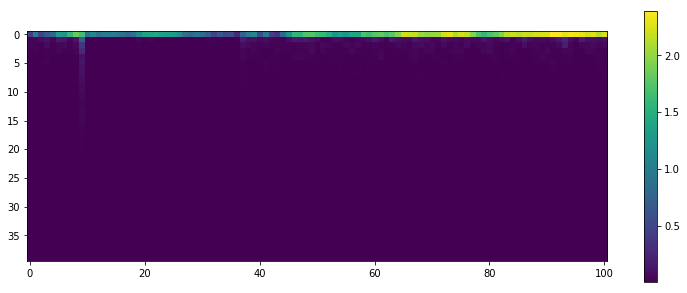

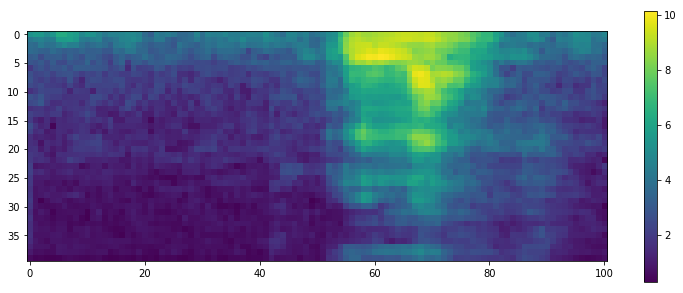

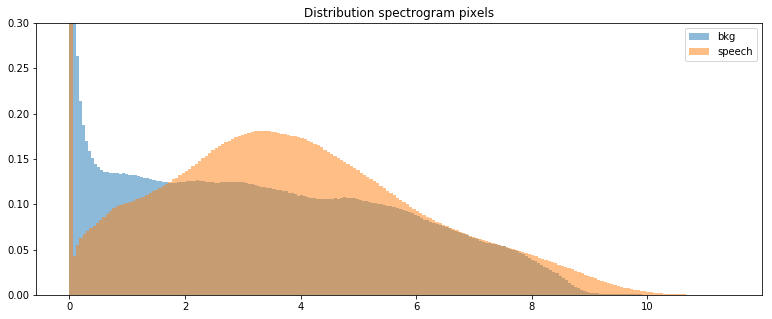

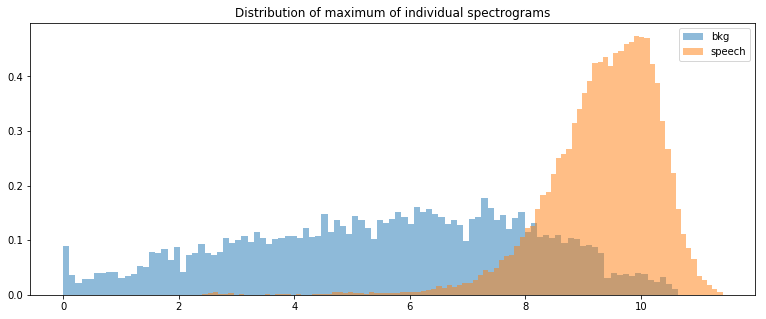

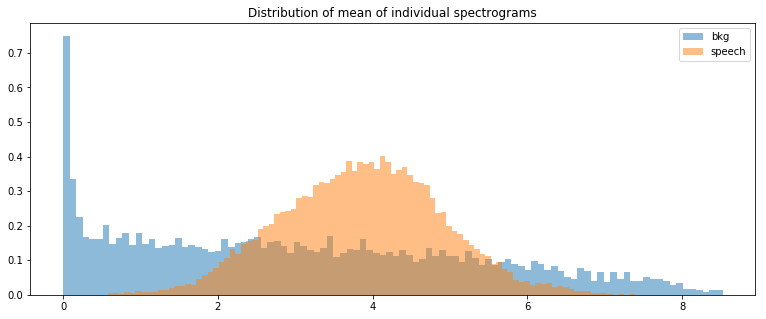

(29858, 40, 101, 1)
1


In [0]:


plt.imshow(bkg_spect[np.random.randint(num_bkg_examples),:,:,0])
plt.colorbar()
plt.show()

plt.imshow(speech_spect[np.random.randint(speech_spect.shape[0]),:,:,0])
plt.colorbar()
plt.show()


plt.hist(bkg_spect.flatten(),bins=200,density=True,alpha=0.5, label='bkg',cumulative=False)
plt.hist(speech_spect.flatten(),bins=200,density=True,alpha=0.5,label='speech',cumulative=False)
plt.legend(loc='upper right')
plt.title('Distribution spectrogram pixels')
plt.ylim((0,0.3))
plt.show()

plt.hist(np.amax(bkg_spect,axis=(1,2)).flatten(),bins=100,density=True,alpha=0.5, label='bkg')
plt.hist(np.amax(speech_spect,axis=(1,2)).flatten(),bins=100,density=True,alpha=0.5,label='speech')
plt.legend(loc='upper right')
plt.title('Distribution of maximum of individual spectrograms')
plt.show()

plt.hist(np.mean(bkg_spect,axis=(1,2)).flatten(),bins=100,density=True,alpha=0.5, label='bkg')
plt.hist(np.mean(speech_spect,axis=(1,2)).flatten(),bins=100,density=True,alpha=0.5,label='speech')
plt.legend(loc='upper right')
plt.title('Distribution of mean of individual spectrograms')
plt.show()

print(speech_spect.shape)
# Data generator: https://github.com/fchollet/keras/blob/master/examples/cifar10_cnn.py
print(spec_thr)

In [0]:
X_train = np.append(speech_spect, bkg_spect, axis=0)

print(X_train.shape)
train_labels = speech_labels.copy()
train_labels.extend(bkg_labels)
print(len(train_labels), len(speech_labels))

(35858, 40, 101, 1)
35858 29858


### Convert the labels into one-hot
Also, caluclate class weights 

In [0]:
label_index = keywords.copy()
label_index.extend(['unknown','silence'])
Y_train = pd.get_dummies(train_labels)
Y_train = Y_train[label_index].values 

#normalize_each_sample = True
#if normalize_each_sample:
#    X_train = X_train - np.mean(X_train,axis=(1,2),keepdims=True)

input_shape = X_train.shape[1:]
nclass = len(label_index)

if use_class_weights:
    class_weight = 1/np.sum(Y_train,axis=0)
    class_weight = class_weight/np.mean(class_weight)
else:
    class_weight = None

print(class_weight)
print(label_index)

None
['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go', 'unknown', 'silence']


### Train the network

In [0]:
#from keras.models import Sequential
reload(scm)
#reload(scu)
#from losswise.libs import LosswiseKerasCallback
#tb_callback = keras.callbacks.TensorBoard()


if use_binary_ent:
    act = 'sigmoid'
    loss = 'binary_crossentropy'
else:
    act = 'softmax'
    loss = 'categorical_crossentropy'


model = scm.conv_network(input_shape=input_shape, nclass=nclass, num_F=16, dropout_prob=0.1, pool_type='max', act=act)
#model = scm.separable_conv_network(input_shape=input_shape, nclass=nclass, num_F=32, dropout_prob=0.1)

# 5+2 epochs is really enough - at least for the deeper model

model.compile(loss=loss, optimizer='Adam', metrics=['binary_accuracy', 'categorical_accuracy'])
model.summary()
#opt = keras.optimizer.Adam
lr_step_decay = lambda epoch: scu.step_decay(epoch, initial_lrate=1e-3, epochs_drop=[7], drop=0.1)
lrate_callback = LearningRateScheduler(lr_step_decay)
callbacks = [lrate_callback]

# Train the model!
history_callback = model.fit(X_train, Y_train, batch_size=64, epochs=10, shuffle=True, 
          verbose=1, callbacks=callbacks, class_weight=class_weight)
model.save(os.path.join(model_path, 'cnn.model'))


#loss_history = history_callback.history["loss"]

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 40, 101, 16)       160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 40, 101, 16)       64        
_________________________________________________________________
activation_1 (Activation)    (None, 40, 101, 16)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 51, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 51, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 20, 51, 32)        128    

### Predict the labels of the test data. 
Use the trained network to label the test data set and write the results to file.

In [0]:
#load model
reload(scu)
#test_data_path = os.path.normpath('C:/Users/johabergs/Desktop/Speech recognition/test_tiny') 
test_data_path = os.path.normpath('C:/Users/johabergs/Desktop/Speech recognition/test/audio') 
#load_path = os.path.normpath('.')  
#model = keras.models.load_model(os.path.join(load_path,'cnn.model'))
#reload(scu)
#model.summary()

test_files,test_labels,test_probs,test_acts = scu.label_speech_test_data(model,
                                                                         test_data_path,
                                                                         spec_thr,
                                                                         label_index)


Predicting on test files...
Predicted: 1024, 2048, 3072, 4096, 5120, 6144, 7168, 8192, 

In [0]:
print(np.sum(test_probs, axis=1))

### Investigate model predictions
Plot the distribution of labels in the training set, and the distribution of rpedicted labels on the test set.

In [0]:
from collections import Counter

common = Counter(train_labels).most_common()
labels = [item[0] for item in common]
number = [item[1] for item in common]
nbars = len(common)
plt.bar(np.arange(nbars), number, tick_label=labels)
plt.title('Train data class distribution')
plt.show()

common = Counter(test_labels).most_common()
labels = [item[0] for item in common]
number = [item[1] for item in common]
nbars = len(common)
plt.bar(np.arange(nbars), number, tick_label=labels)
plt.title('Test data predicted class distribution')
plt.show()

#### Investigate predicted probabilities
Plot the distribution of the probabilities of the predicted class of each test sample, both over the whole test set and per predicted class.

In [0]:
max_probs = np.amax(test_probs,axis=1)
#max_acts = np.amax(test_acts,axis=1)
pred_idx = np.argmax(test_probs, axis=1)


test_probs_sorted = np.sort(test_probs,axis=1)
test_probs_second = test_probs_sorted[:,-2]
print(test_probs_second.shape)

In [0]:
plt.hist( max_probs,200, log=True, cumulative=True, density=True)
plt.title('CDF of probs for predicted class')
plt.ylim((1e-2,1))
plt.grid()
plt.show()

for i in range(0,12):
    plt.hist(max_probs[pred_idx == i],bins=100,density=True,alpha=1, log=True, cumulative=True, 
             label=label_index[i], histtype ='step')    
plt.grid()
plt.ylim((1e-2,1))
plt.legend(loc='upper left')
#plt.title('CDF for prob of preidcted class, per class')
plt.show()

In [0]:
sub_file = 'bothprobcut'
for p_thr in [0.402]:
    print('p_thr = ' + str(p_thr))
    with open(sub_file+str(p_thr)+'.csv','w') as sfile:
        sfile.write('fname,label\n')
        for i,lab in enumerate(test_labels):
            if test_probs_second[i]>0.4 or max_probs[i]<0.2:
                lab = 'unknown'  
            sfile.write(test_files[i] + ',' + lab + '\n')   

#### Investigate predicted activation values
Plot the calculated test activations. Plot the full score disitrbution, and the distributions of the maxima over 
the whole test set, as well as per class.

In [0]:
plt.hist(test_acts.flatten(),200, log=True, cumulative=True, density=True)
plt.title('Score distribution')
plt.ylim((1e-2,1))
plt.grid()
plt.show()

plt.hist(np.amax(test_acts,axis=1),200, log=True, cumulative=True, density=True)
plt.title('Maximum score distribution')
plt.ylim((1e-2,1))
plt.grid()
plt.show()


for i in range(4,12):
    plt.hist(max_acts[pred_idx == i],bins=100,density=True,alpha=1, log=True, cumulative=True, 
             label=label_index[i], histtype ='step')   
plt.grid()
plt.ylim((1e-2,1))
plt.legend(loc='upper left')
plt.title('Maximum score, per class')
plt.show()

Relabel test files based on different cuts on the score of the predicted class for each file. Write the new labels to file.

In [0]:
sub_file = 'scorecuts'
for s_thr in [-2,0,0.5,1,2]:
    print('s_thr = ' + str(s_thr))
    with open(sub_file+str(s_thr)+'.csv','w') as sfile:
        sfile.write('fname,label\n')
        for i,lab in enumerate(test_labels):
            if np.amax(test_acts[i,:]) < s_thr:
                lab = 'unknown'  
            sfile.write(test_files[i] + ',' + lab + '\n')   
               



Reads two submission files and check which number and percentage of labels they differ on

In [0]:
f1 = open('submission.csv','r')
f2 = open('bothprobcut0.401.csv','r')

same = 0

for i, lab in enumerate(test_labels):
    l1 = f1.readline()
    l2 = f2.readline()
    if l1 == l2:
        same += 1
f1.close()
f2.close()

print('Same labels: ' + str(same))
print('Percent changed labels: ' + str(1-same/len(test_labels)))